<a href="https://colab.research.google.com/github/harishgawade1999/Face-Emotion-Recognition/blob/main/Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Live Class Monitoring System (Real Time Face Emotion Recognition)**

# **Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who

need special attention. Digital classrooms are conducted via video telephony software program (ex-
Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the

mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf 
from tensorflow import keras
import cv2
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, Flatten,Conv2D
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading dataset**

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Github/Live_Class_Monitoring_System/

/content/drive/MyDrive/Github/Live_Class_Monitoring_System


In [ ]:
# # unzip dataset
# !unzip ./archive.zip

In [ ]:
# file directory
train_dir = "./data/train/"
test_dir = "./data/test/"

## **Actual look of data**

In [ ]:
# function to plot 5 images

def plot_images(img_dir, top=5):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='Blues_r')

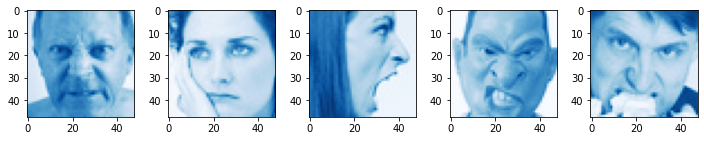

In [ ]:
#angry class images
plot_images(train_dir+"angry")

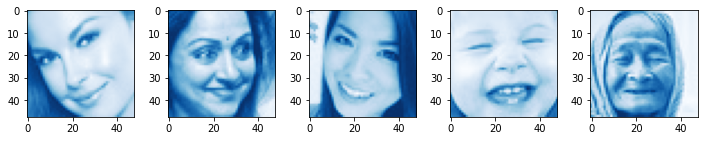

In [ ]:
#happy class images
plot_images(train_dir+"happy")

In [ ]:
# assinging a image from train
img_array = cv2.imread(train_dir+"angry/Training_3908.jpg")

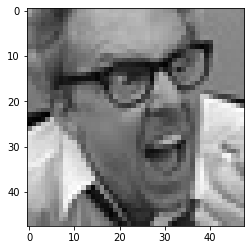

In [ ]:
plt.imshow(img_array)

In [ ]:
# checking image shape
img_array.shape

(48, 48, 3)

In [ ]:
# getting count of images in training set
emotions = ['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
no_of_images = []
for emotion in emotions:
  no_of_images.append(len(os.listdir(os.path.join(train_dir, emotion))))

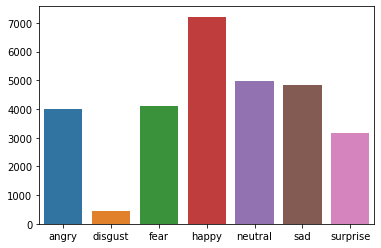

In [ ]:
# ploting count of images in training set
sns.barplot(x=emotions, y=no_of_images);

We can see the images of different emotions do not have the same distribution i.e. data is imbalance. The happy images are more whereas disgust images are very less.

# **Data Preprocessing**

### **Data augmentation using data generator**

In [ ]:
# Train data generator
datagen = ImageDataGenerator(rescale=1./255)

train_set = datagen.flow_from_directory(train_dir,
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
train_set.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
# Validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_datagen.flow_from_directory(test_dir,
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

validation_set.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# **Deepface**

In [ ]:
pip install deepface

In [ ]:
# importing deepface
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
# loading images
img1_path = './data/2c446a93f539b8b2e3d2e98ae213fae6.jpg'
img2_path = './data/c6faf98c4385d683b8ce143273bd933e.png'

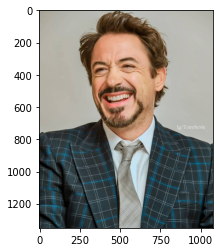

In [ ]:
# 1st image
img_1 = cv2.imread(img1_path)
plt.imshow(img_1[:, :,::-1])

In [ ]:
# analyzing image 1
demography = DeepFace.analyze(img1_path)
demography

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 89.0MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:41<00:00, 12.9MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:18<00:00, 28.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:14<00:00, 36.8MB/s]
Action: race: 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


{'age': 44,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 1.4374295944323974e-07,
  'disgust': 1.9459875003522582e-12,
  'fear': 0.0031362267741640226,
  'happy': 99.99136328645726,
  'neutral': 0.005346198259183847,
  'sad': 2.9587912551686202e-06,
  'surprise': 0.00015565899293621237},
 'gender': 'Man',
 'race': {'asian': 0.06033290992490947,
  'black': 0.02170284860767424,
  'indian': 0.24969263467937708,
  'latino hispanic': 13.51948082447052,
  'middle eastern': 11.043965071439743,
  'white': 75.10482668876648},
 'region': {'h': 480, 'w': 480, 'x': 240, 'y': 163}}

In [ ]:
demography['emotion']

{'angry': 1.4374295944323974e-07,
 'disgust': 1.9459875003522582e-12,
 'fear': 0.0031362267741640226,
 'happy': 99.99136328645726,
 'neutral': 0.005346198259183847,
 'sad': 2.9587912551686202e-06,
 'surprise': 0.00015565899293621237}

The person in below image is happy


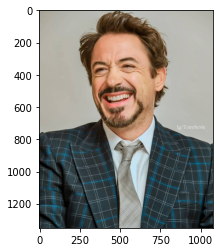

In [ ]:
# detecting emotion of image 1
plt.imshow(img_1[:, :,::-1]);
emotion1 = demography['dominant_emotion']
print(f"The person in below image is {emotion1}")

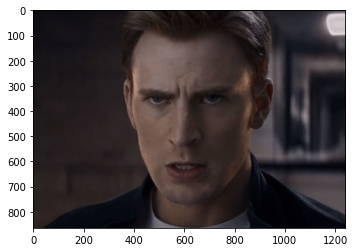

In [ ]:
# ploting img2
img_2 = cv2.imread(img2_path)
plt.imshow(img_2[:, :,::-1])

In [ ]:
# checking emotion of image 2
demography2 = DeepFace.analyze(img2_path)
demography2

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 56.3MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:04<00:00, 109MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:16<00:00, 31.7MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:18<00:00, 28.5MB/s]
Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


{'age': 31,
 'dominant_emotion': 'sad',
 'dominant_race': 'white',
 'emotion': {'angry': 36.683133244514465,
  'disgust': 0.0005685736141458619,
  'fear': 21.98343575000763,
  'happy': 6.181612555167249e-07,
  'neutral': 0.2446819795295596,
  'sad': 41.08538329601288,
  'surprise': 0.002799381036311388},
 'gender': 'Man',
 'race': {'asian': 0.7032226724608346,
  'black': 0.25236202976775346,
  'indian': 2.9174970339236874,
  'latino hispanic': 17.28970064459447,
  'middle eastern': 32.666554013881324,
  'white': 46.17066360537193},
 'region': {'h': 562, 'w': 562, 'x': 323, 'y': 146}}

The person in below image is sad


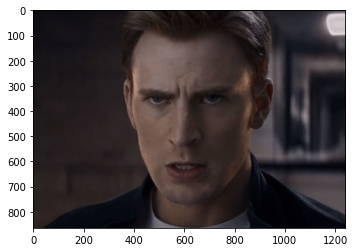

In [ ]:
# detecting emotion of image 2
emotion2 = demography2['dominant_emotion']

plt.imshow(img_2[:, :,::-1]);
print(f"The person in below image is {emotion2}")

> **In first image the deepface model is detecting the correct emotion of the person in the image whereas in the second case the person is angry but the model is predicting it as sad.**

# **Simple CNN model**
Due to requirement of gpu and to train the model in less time we have used kaggle notebook to train this model.

In [ ]:
# create model structure
emotion_model = Sequential()

# 1st CNN layer
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# 2nd CNN layer
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Fully Connected layer
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [ ]:
# compiling model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_set,
        steps_per_epoch=28709 // 32,
        epochs=20,
        validation_set,
        validation_steps=7178 // 32)

In [ ]:
# saving model
emotion_model.save('./simple_cnn_model.h5')

In [ ]:
# importing saved model
emotion_model = keras.models.load_model('./models/simple_cnn_model.h5')

In [ ]:
# model summary
emotion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [ ]:
history =  emotion_model.history
history.keys()

In [ ]:
# ploting accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'] , c = "red", label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(loc='lower right')
plt.show()
plt.savefig("./simple_cnn_accuracy.png")

In [ ]:
# ploting loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'] , c = "red", label='Validation Loss')
plt.title("Training loss vs Validation Loss")
plt.legend(loc='upper right')
plt.show()
plt.savefig("./simple_cnn_loss.png")

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
# Predicting For Test Set
predictions = emotion_model.predict(validation_set)

# Printing Confution Matrix
cm = confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=validation_set.classes)                         
cm

In [ ]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# compute predictions
predictions = emotion_model.predict_generator(generator=validation_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_set.classes
class_names = validation_set.class_indices.keys()

# compute confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot onfusion matrix
plt.figure()
plot_confusion_matrix(con_matrix, classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("./simple_cnn_cm.png")

> **We got 70.24% train accuracy and 61.06% validation accuracy using this simple CNN model but the model was not able to predict emotions precisely when we tested it in real time.**

# **CNN Model with deep layers**

Due to requirement of gpu and to train the model in less time we have used kaggle notebook to train this model.

In [ ]:
# model building
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [ ]:
# compiling model
model.compile(optimizer=Adam(lr = 0.001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# creating checkpoint
checkpoint = ModelCheckpoint("./model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# learning rate
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_lr=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [ ]:
epochs = 30
steps_per_epoch= train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

In [ ]:
# Train the neural network/model
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=steps_per_epoch,
                                epochs=epochs,
                                validation_data = validation_set,
                                validation_steps = validation_steps,
                                callbacks=callbacks_list
                                )

In [ ]:
# saving model
model.save("./final_model.h5")
model.save_weights("./final_model_weights.h5")

In [ ]:
# loading saved model
model = keras.models.load_model('./final_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
h =  history.history
h.keys()

In [ ]:
# Comparing accuracy
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'] , c = "red", label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(loc='lower right')
plt.show()
plt.savefig("./final_cnn_accuracy.png")

In [ ]:
# comparing loss
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'] , c = "red", label='Validation Loss')
plt.title("Training loss vs Validation Loss")
plt.legend(loc='upper right')
plt.show()
plt.savefig("./final_cnn_loss.png")

In [ ]:
# Predicting For Test Set
predictions = model.predict(validation_set)

# Printing Confution Matrix
cm = confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=validation_set.classes)                         
cm

In [ ]:
# compute predictions
predictions = model.predict_generator(generator=validation_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_set.classes
class_names = validation_set.class_indices.keys()

# compute confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(con_matrix, classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("./final_cnn_cm.png")

## **Testing model using webcam on google colab**

In [ ]:
from tensorflow import keras
model = keras.models.load_model('./final_model.h5')

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open('./custom_model_result.json', "w") as json_file:
    json_file.write(model_json)

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image

# start streaming video from webcam
  video_stream()

# label for video
  label_html = 'Capturing...'

# initialze bounding box to empty
  bbox = ''
  count = 0
# face cascade classifier for face detection
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/Github/Live_Class_Monitoring_System/haarcascade_frontalface_default.xml') # Face Detection
  
  emotion_identifier =load_model('/content/drive/MyDrive/Github/Live_Class_Monitoring_System/final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detecting multiple faces
    faces = face_cascade.detectMultiScale(gray)
    
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = emotion_identifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

face_detect()

<IPython.core.display.Javascript object>

# **Conclusion**



Using a deep learning model based on the architecture of CNN, we constructed a framework to analyze student’s emotions.
Simple CNN model gave 70.24% train accuracy and 61.06% validation accuracy but not able to predict emotions precisely when tested in real time.
CNN using deep layers has 73.27% train accuracy and 58.55% validation accuracy. 
This model was accurate in predicting tested in real time.
There were less disgust images in the dataset that's why model confused in detecting disgust.
This model can help the teachers to adjust their teaching strategies accordingly to improve the efficiency of online teaching.
